# Plotting discrete choropleth shapes

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import geomappy as mp
import numpy as np
import pandas as pd
import os
from geomappy.basemap import ProjectCustomExtent
import cartopy.feature as cf
import cartopy.crs as ccrs

In [2]:
os.chdir("../../../")

Loading data on riverbank plastic observations in the Netherlands (Van Emmerik et al., 2020)

In [3]:
df = pd.read_csv("data/processed_data_SDN/df_hm_included.csv", index_col=0)
df_locations = gpd.read_file("data/processed_data_SDN/df_locations.geojson")

In [4]:
df.columns, df_locations.columns

(Index(['Gebiedscode', 'meting', 'date', 'doy', 'dop', 'plastic_6_packringen',
        'plastic_tassen', 'plastic_kleine_plastic_tasjes',
        'plastic_drankflessen_groterdan_halveliter',
        'plastic_drankflessen_kleinerdan_halveliter',
        ...
        'U_2d_mean', 'U_7d_mean', 'U_14d_mean', 'U_1m_mean', 'U_6m_mean',
        'h_2d_max_above_current', 'h_7d_max_above_current',
        'h_14d_max_above_current', 'h_1m_max_above_current',
        'h_6m_max_above_current'],
       dtype='object', length=161),
 Index(['Gebiedscode', 'river', 'x_maas', 'x_waal', 'geometry'], dtype='object'))

In [5]:
temp_df = df_locations.merge(df.groupby("Gebiedscode")['granulaat_korrels'].count(),
                             left_on='Gebiedscode',
                             right_index=True)
temp_df.loc[temp_df.Gebiedscode.str.contains("REFE"), 'granulaat_korrels'] = 5
temp_df = temp_df.sort_values('granulaat_korrels', ascending=True)

This example requires a little more setup, but the important part happens in the call to ``plot_classified_shapes``. Here discrete values (occurences of observations) are mapped to colors (generated with an incorporated discrete color function) and labels.

In [6]:
ProjectCustomExtent(epsg=28992, extent=[-1000000, 500000, -100000, 800000])

<Derived Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

/Users/jroebroek/Packages/geomappy/geomappy/shapes.py:180: FutureWarning: plot_point_collection is intended for internal use only, and will be deprecated.
  plot_point_collection(ax, points, facecolor=facecolor[point_idx], edgecolor=edgecolor[point_idx],


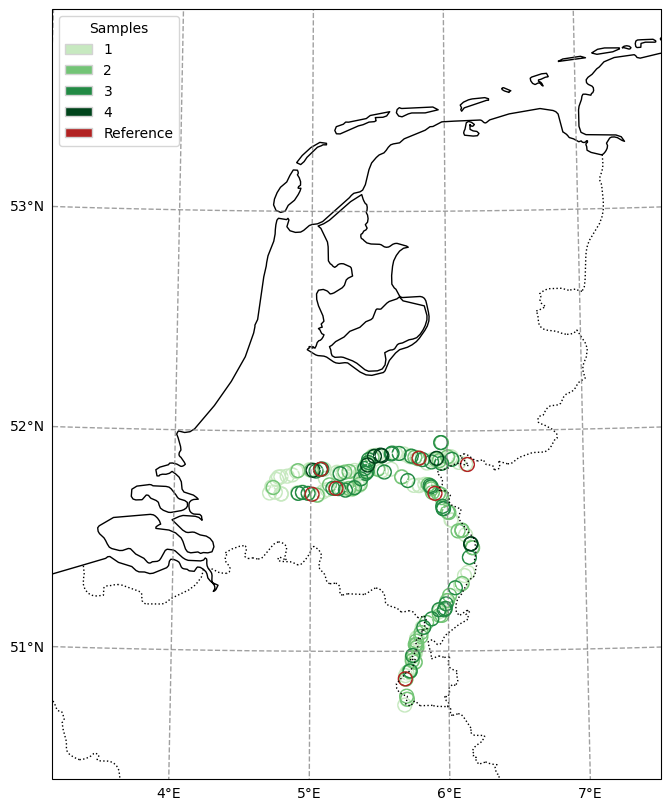

In [7]:
ax = mp.basemap(projection=ProjectCustomExtent(epsg=28992, extent=[-1000000, 500000, -100000, 800000]))
ax.set_extent((3.17, 7.5, 50.4, 53.9), crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
mp.add_ticks(ax, 1)
mp.add_gridlines(ax, 1, alpha=0.75)
ax.add_feature(
        cf.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land', '10m', facecolor='none', edgecolor='k'),
        label='Stereo', lw=1, linestyle=":")
ax.add_feature(cf.NaturalEarthFeature('physical', 'lakes', '10m', facecolor='none', edgecolor='black'))

ax, legend = mp.plot_classified_shapes(df=temp_df, values='granulaat_korrels', s=1, legend='legend', ax=ax, facecolor='white',
                                       colors=mp.colors.colors_discrete("Greens", 5)[1:].tolist() + ["Firebrick"],
                                       legend_kw={'loc': 2, 'title':"Samples"},
                                       linewidth=10,
                                       labels=["1", "2", "3", "4", "Reference"], transform=ccrs.PlateCarree())

/Users/jroebroek/Packages/geomappy/geomappy/shapes.py:180: FutureWarning: plot_point_collection is intended for internal use only, and will be deprecated.
  plot_point_collection(ax, points, facecolor=facecolor[point_idx], edgecolor=edgecolor[point_idx],


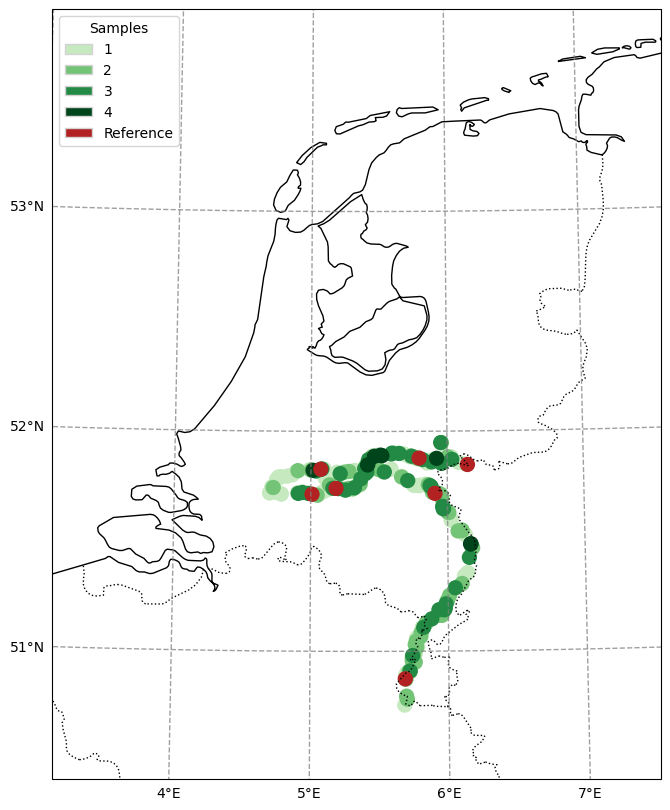

In [8]:
ax = mp.basemap(projection=ProjectCustomExtent(epsg=28992, extent=[-1000000, 500000, -100000, 800000]))
ax.set_extent((3.17, 7.5, 50.4, 53.9), crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
mp.add_ticks(ax, 1)
mp.add_gridlines(ax, 1, alpha=0.75)
ax.add_feature(
        cf.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land', '10m', facecolor='none', edgecolor='k'),
        label='Stereo', lw=1, linestyle=":")
ax.add_feature(cf.NaturalEarthFeature('physical', 'lakes', '10m', facecolor='none', edgecolor='black'))

ax, legend = mp.plot_classified_shapes(df=temp_df, values='granulaat_korrels', s=100, legend='legend', ax=ax,
                                       colors=mp.colors.colors_discrete("Greens", 5)[1:].tolist() + ["Firebrick"],
                                       legend_kw={'loc': 2, 'title':"Samples"},
                                       linewidth=1,
                                       labels=["1", "2", "3", "4", "Reference"], transform=ccrs.PlateCarree())